In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import numpy as no 
import seaborn as sns 
import datetime as dt


In [4]:
data=pd.read_csv('all_stocks_5yr.csv')

In [5]:
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [6]:
data=data.rename(columns={'Name':'Ticks'})

In [7]:
data.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Ticks   619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [11]:
amazon=data.loc[data['Ticks']=='AMZN']

In [12]:
amz_df=amazon.copy()

In [16]:
amz_df

,date,open,high,low,close,volume,Ticks
46387,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
46388,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
46389,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
46390,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
46391,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN
...,...,...,...,...,...,...,...
47641,2018-02-01,1445.00,1459.88,1385.140,1390.00,9113808,AMZN
47642,2018-02-02,1477.39,1498.00,1414.000,1429.95,11125722,AMZN
47643,2018-02-05,1402.62,1458.98,1320.720,1390.00,11494985,AMZN
47644,2018-02-06,1361.46,1443.99,1351.790,1442.84,11066819,AMZN


In [35]:
amz_df['date'] = pd.to_datetime(amazon['date'], format="%Y-%m-%d")

In [36]:
amz_df

,date,open,high,low,close,volume,Ticks
46387,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
46388,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
46389,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
46390,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
46391,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN
...,...,...,...,...,...,...,...
47641,2018-02-01,1445.00,1459.88,1385.140,1390.00,9113808,AMZN
47642,2018-02-02,1477.39,1498.00,1414.000,1429.95,11125722,AMZN
47643,2018-02-05,1402.62,1458.98,1320.720,1390.00,11494985,AMZN
47644,2018-02-06,1361.46,1443.99,1351.790,1442.84,11066819,AMZN


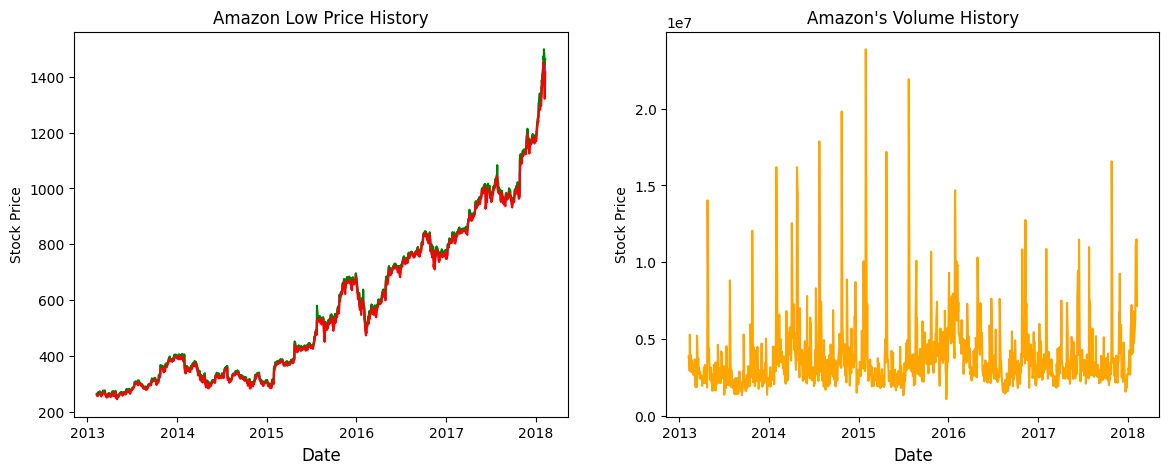

In [37]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
ax1.plot(amz_df["date"], amz_df["close"])
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Amazon Close Price History")

# Second Subplot
ax1.plot(amz_df["date"], amz_df["high"], color="green")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Amazon High Price History")

# Third Subplot
ax1.plot(amz_df["date"], amz_df["low"], color="red")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Amazon Low Price History")

# Fourth Subplot
ax2.plot(amz_df["date"], amz_df["volume"], color="orange")
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Stock Price")
ax2.set_title("Amazon's Volume History")
plt.show()

In [26]:
from prophet import Prophet


In [38]:
model=Prophet()


In [39]:
ph_df = amz_df.drop(['open', 'high', 'low','volume', 'Ticks'], axis=1)
ph_df.rename(columns={'close': 'y', 'date': 'ds'}, inplace=True)

ph_df.head()

,ds,y
46387,2013-02-08,261.95
46388,2013-02-11,257.21
46389,2013-02-12,258.70
46390,2013-02-13,269.47
46391,2013-02-14,269.24


In [40]:
model.fit(ph_df)

future_prices = model.make_future_dataframe(periods=365)

forecast = model.predict(future_prices)



10:45:52 - cmdstanpy - INFO - Chain [1] start processing
10:45:53 - cmdstanpy - INFO - Chain [1] done processing


In [41]:
future_prices

,ds
0,2013-02-08
1,2013-02-11
2,2013-02-12
3,2013-02-13
4,2013-02-14
...,...
1619,2019-02-03
1620,2019-02-04
1621,2019-02-05
1622,2019-02-06


10:49:00 - cmdstanpy - INFO - Chain [1] start processing
10:49:01 - cmdstanpy - INFO - Chain [1] done processing


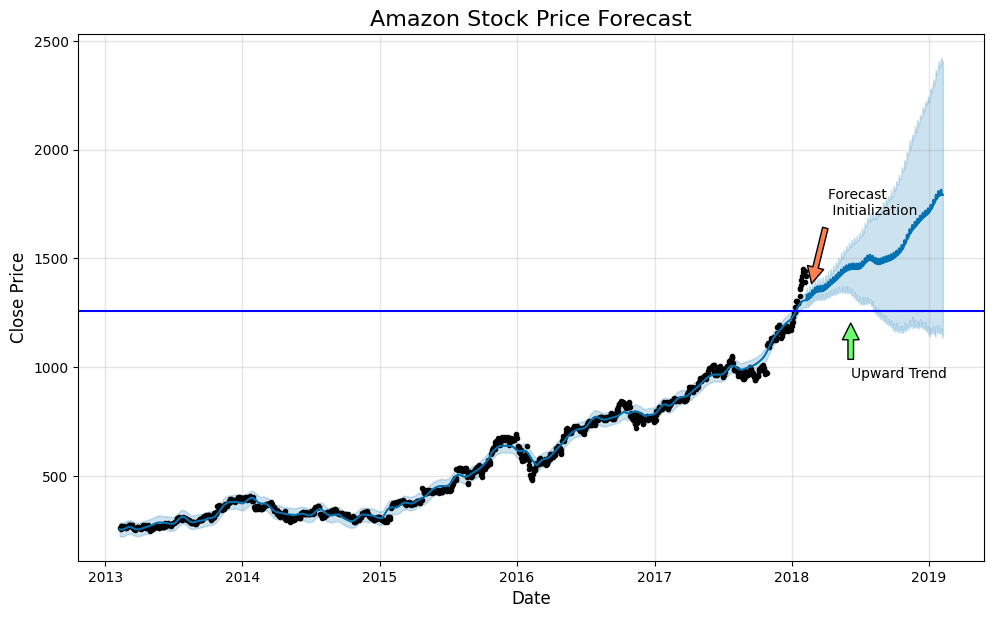

In [ ]:
import matplotlib.dates as mdates
import datetime as dt

model = Prophet()
model.fit(ph_df)

future_prices = model.make_future_dataframe(periods=365)
forecast = model.predict(future_prices)

starting_date = dt.datetime(2018, 4, 7)
trend_date = dt.datetime(2018, 6, 7)
pointing_arrow = dt.datetime(2018, 2, 18)

starting_date1 = mdates.date2num(starting_date)
trend_date1 = mdates.date2num(trend_date)
pointing_arrow1 = mdates.date2num(pointing_arrow)

fig = model.plot(forecast)
ax1 = fig.gca()  

ax1.set_title("Amazon Stock Price Forecast", fontsize=16)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Close Price", fontsize=12)

ax1.annotate('Forecast \n Initialization', xy=(pointing_arrow1, 1350), xytext=(starting_date1, 1700),
             arrowprops=dict(facecolor='#ff7f50', shrink=0.1),
             fontsize=10, color='black')

ax1.annotate('Upward Trend', xy=(trend_date1, 1225), xytext=(trend_date1, 950),
             arrowprops=dict(facecolor='#6cff6c', shrink=0.1),
             fontsize=10, color='black')

ax1.axhline(y=1260, color='b', linestyle='-')

plt.show()


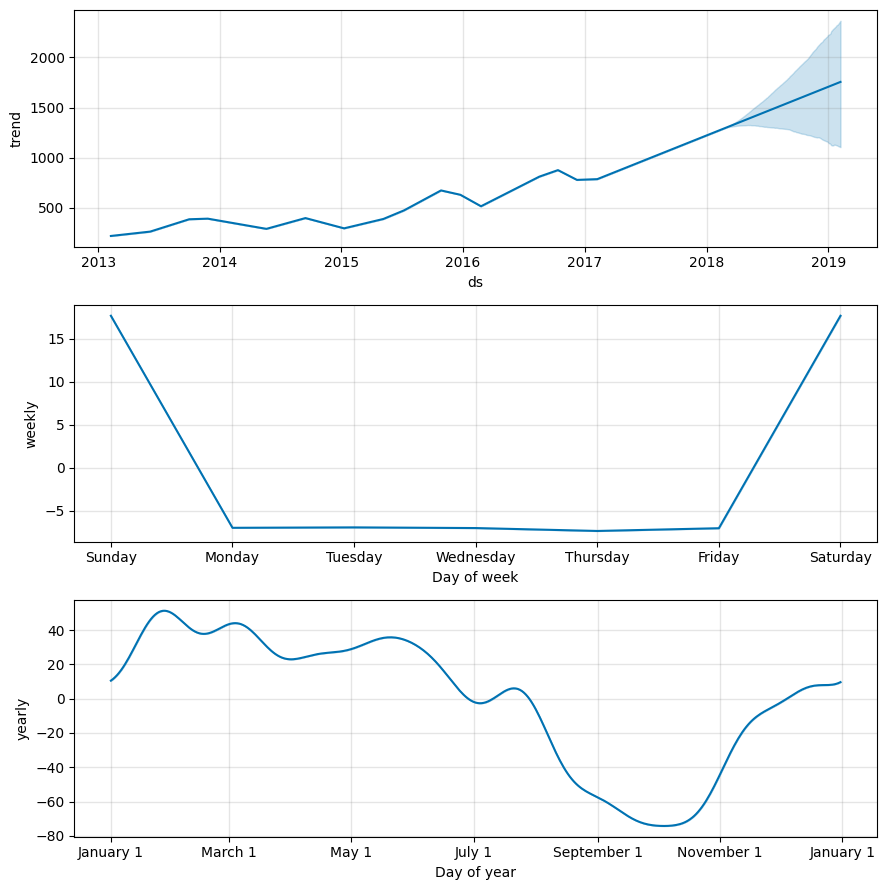

In [46]:
fig2 = model.plot_components(forecast)
plt.show()

10:50:42 - cmdstanpy - INFO - Chain [1] start processing
10:50:42 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Rania\anaconda3\envs\mlops\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


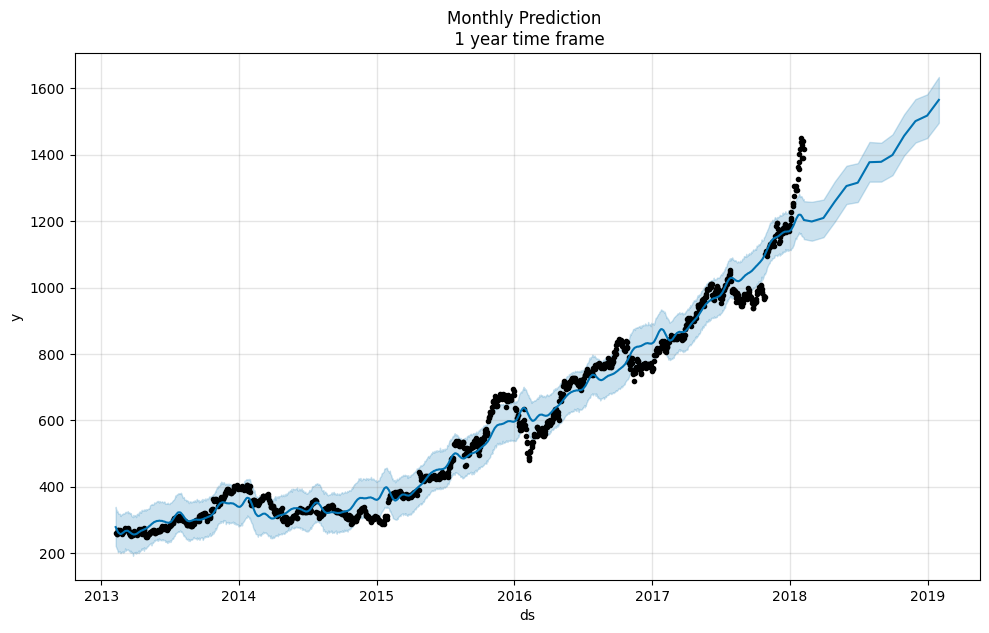

In [47]:
m = Prophet(changepoint_prior_scale=0.01).fit(ph_df)
future = m.make_future_dataframe(periods=12, freq='M')
fcst = m.predict(future)
fig = m.plot(fcst)
plt.title("Monthly Prediction \n 1 year time frame")

plt.show()